## Importing Libraries

In [1157]:
from typing import List, Tuple

from lazypredict.Supervised import LazyClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns


In [1158]:
# Import dataframe
cervical_data_original = pd.read_csv('cervical_cancer_dataset.csv')
cervical_data_original.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [1159]:
cervical_data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

# Data Preprocessing


In [1160]:
# Replace '?' with NaN
cervical_data_original = cervical_data_original.replace('?', np.nan)

In [1161]:
cervical_data_original.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [1162]:
numerical_values = [
    'Age',
    'Number of sexual partners',
    'First sexual intercourse',
    'Num of pregnancies',
    'Smokes (years)',
    'Smokes (packs/year)',
    'Hormonal Contraceptives (years)',
    'IUD (years)',
    'STDs (number)']

categorical_values = [
    'Smokes',
    'Hormonal Contraceptives',
    'IUD',
    'STDs',
    'STDs:condylomatosis',
    'STDs:cervical condylomatosis',
    'STDs:vaginal condylomatosis',
    'STDs:syphilis',
    'STDs:vulvo-perineal condylomatosis',
    'Dx:CIN',
    'STDs:pelvic inflammatory disease',
    'STDs:genital herpes',
    'STDs:molluscum contagiosum',
    'STDs:AIDS',
    'STDs:HIV',
    'STDs:Hepatitis B',
    'STDs:HPV',
    'STDs: Number of diagnosis',
    'Dx:Cancer',
    'Dx:HPV',
    'Dx',
    'Hinselmann',
    'Schiller',
    'Citology',
    'Biopsy']

In [1163]:
# Convert the object type to numeric type
cervical_data_original = cervical_data_original.apply(pd.to_numeric)

In [1164]:
# Replace null values with mean
cervical_data_original = cervical_data_original.fillna(cervical_data_original.mean())

In [1165]:
# New check for null values
cervical_data_original.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [1166]:
# Drop the columns with too many missing values and
#the columns with a very low correlation with the target

# Don't drop the columns:
# STDs (number), First sexual intercourse,Num of pregnancies

cervical_data = cervical_data_original[[
    'Age',
    'Number of sexual partners',
    'First sexual intercourse',
    'Num of pregnancies',
    'Smokes (years)',
    'Smokes (packs/year)',
    'Hormonal Contraceptives (years)',
    'IUD (years)',
    'STDs',
    'STDs (number)',
    'STDs:condylomatosis',
    'STDs:cervical condylomatosis',
    'STDs:vaginal condylomatosis',
    'STDs:vulvo-perineal condylomatosis',
    'STDs:syphilis',
    'STDs:pelvic inflammatory disease',
    'STDs:genital herpes',
    'STDs:molluscum contagiosum',
    'STDs:AIDS',
    'STDs:HIV',
    'STDs:Hepatitis B',
    'STDs:HPV',
    'STDs: Number of diagnosis',
    'Dx:Cancer',
    'Dx:CIN',
    'Dx:HPV',
    'Citology', 'Hinselmann', 'Schiller', 'Biopsy'
]]

cervical_data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs,STDs (number),...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Citology,Hinselmann,Schiller,Biopsy
0,18,4.00,15.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0,0,0,0,0,0,0,0
1,15,1.00,14.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0,0,0,0,0,0,0,0
2,34,1.00,17.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0,0,0,0,0,0,0,0
3,52,5.00,16.00,4.00,37.00,37.00,3.00,0.00,0.00,0.00,...,0.00,0.00,0,1,0,1,0,0,0,0
4,46,3.00,21.00,4.00,0.00,0.00,15.00,0.00,0.00,0.00,...,0.00,0.00,0,0,0,0,0,0,0,0


In [1167]:
# substitute the Biopsy column with the sum of the columns Biopsy Citology, Hinselmann and Schiller
cervical_data['Target'] = cervical_data['Biopsy'] + cervical_data['Hinselmann'] + cervical_data['Schiller'] + cervical_data['Citology']


In [1168]:
cervical_data = cervical_data.drop(['Citology', 'Hinselmann', 'Schiller', 'Biopsy'], axis=1)

In [1169]:
cervical_data.head(30)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs,STDs (number),...,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Target
0,18,4.00,15.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0
1,15,1.00,14.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0
2,34,1.00,17.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0
3,52,5.00,16.00,4.00,37.00,37.00,3.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,1,0,1,0
4,46,3.00,21.00,4.00,0.00,0.00,15.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0
5,42,3.00,23.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0
6,51,3.00,17.00,6.00,34.00,3.40,0.00,7.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,3
7,26,1.00,26.00,3.00,0.00,0.00,2.00,7.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0
8,45,1.00,20.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,1,0,1,0
9,44,3.00,15.00,2.28,1.27,2.80,0.00,0.51,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0


In [1170]:
columns_name = cervical_data.columns
print(columns_name)

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs',
       'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Target'],
      dtype='object')


In [1171]:
# get_dummies on the categorical values
#for value in categorical_values:
#    if value in columns_name:
#        dummies = pd.get_dummies(cervical_data[value], prefix=value)
#        cervical_data = pd.concat([cervical_data, dummies], axis=1)
#        cervical_data = cervical_data.drop([value], axis=1)

DATA VISUALIZATION

---



In [1172]:
# Count cervical data where 'Biopsy' = 1
cervical_data['Target'].value_counts()

0    756
1     41
3     33
2     22
4      6
Name: Target, dtype: int64

In [1173]:
# correlation matrix about 'Target' column
cervical_data.corr()['Target']

Age                                   0.05
Number of sexual partners            -0.01
First sexual intercourse             -0.00
Num of pregnancies                    0.05
Smokes (years)                        0.07
Smokes (packs/year)                   0.02
Hormonal Contraceptives (years)       0.09
IUD (years)                           0.04
STDs                                  0.10
STDs (number)                         0.11
STDs:condylomatosis                   0.10
STDs:cervical condylomatosis           NaN
STDs:vaginal condylomatosis          -0.02
STDs:vulvo-perineal condylomatosis    0.10
STDs:syphilis                        -0.02
STDs:pelvic inflammatory disease     -0.01
STDs:genital herpes                   0.03
STDs:molluscum contagiosum           -0.01
STDs:AIDS                              NaN
STDs:HIV                              0.13
STDs:Hepatitis B                     -0.01
STDs:HPV                             -0.02
STDs: Number of diagnosis             0.12
Dx:Cancer  

In [1174]:
# Moving the target column at the end
target = cervical_data.pop('Target')
cervical_data['Target'] = target


<Axes: >

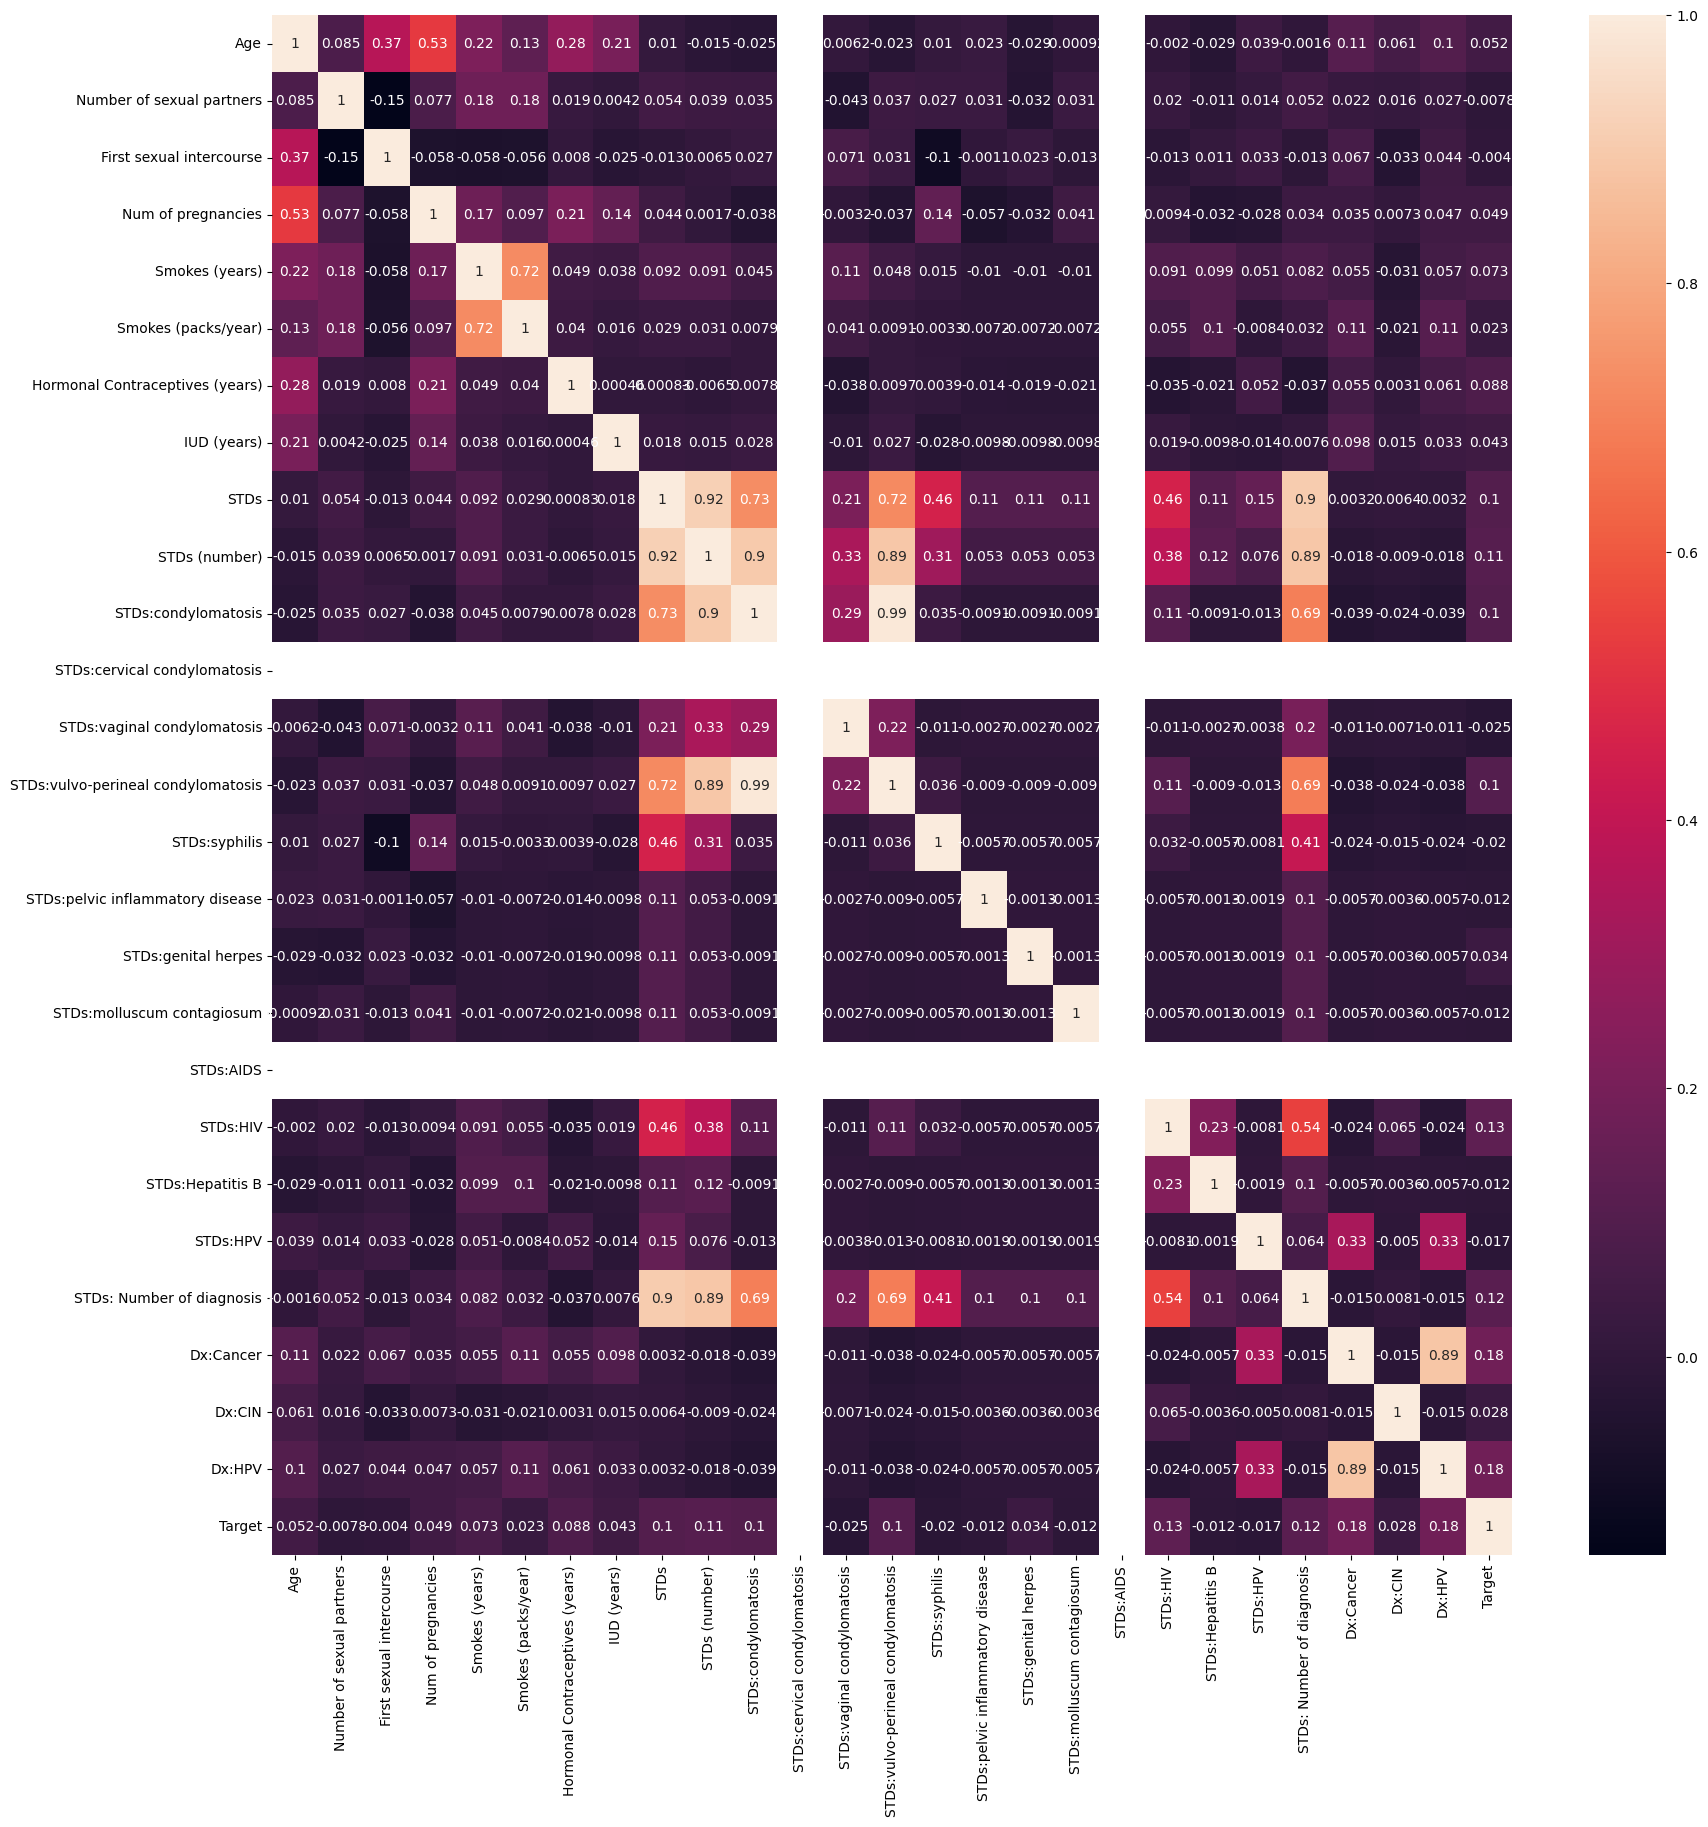

In [1175]:
# Correlation matrix about 'Target' column
plt.figure(figsize=(20,20))
corr = cervical_data.corr()
sns.heatmap(corr, annot=True)

In [1176]:
summary_numeric = cervical_data_original[numerical_values].agg(['mean', 'std', 'min', 'max'])
summary_categorical = cervical_data_original[categorical_values].apply(pd.Series.value_counts)

print("Summary for numerical variables:")
print(summary_numeric)
print("\nSummary for categorical variables:")
print(summary_categorical)

Summary for numerical variables:
       Age  Number of sexual partners  First sexual intercourse  \
mean 26.82                       2.53                     17.00   
std   8.50                       1.64                      2.79   
min  13.00                       1.00                     10.00   
max  84.00                      28.00                     32.00   

      Num of pregnancies  Smokes (years)  Smokes (packs/year)  \
mean                2.28            1.22                 0.45   
std                 1.40            4.06                 2.21   
min                 0.00            0.00                 0.00   
max                11.00           37.00                37.00   

      Hormonal Contraceptives (years)  IUD (years)  STDs (number)  
mean                             2.26         0.51           0.18  
std                              3.52         1.81           0.53  
min                              0.00         0.00           0.00  
max                             3

PREPROCESSING


In [1177]:
# Set up the X and y variables
X = cervical_data.drop(['Target'], axis=1)
y = cervical_data[['Target']]

In [1178]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [1179]:
# Scaling the data whit MinMaxScaler beacouse the data distribution
scalar = MinMaxScaler()
X = scalar.fit_transform(X)

In [1180]:
# Split the data into train, validate and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1181]:
print(X.shape)
print(y.shape)

(858, 26)
(858, 1)


# Trainingthe model

In [1182]:
# Train the model
#xgb = xgb.XGBClassifier(learning_rate=0.1, max_depth=30, n_estimators=100)
#xgb.fit(X_train, y_train)
#accuracy_train = xgb.score(X_train, y_train)
#print(accuracy_train)
#accuracy_test = xgb.score(X_test, y_test)
#print(accuracy_test)
#y_hat = xgb.predict(X_test)
#print(type(y_hat))
#print(classification_report(y_test, y_hat))

In [1183]:
lazy_clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

In [1184]:
models, y_hat = lazy_clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:02<00:00, 11.15it/s]


In [1185]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,0.85,0.26,None,0.84,0.01
LabelSpreading,0.83,0.25,None,0.82,0.03
LabelPropagation,0.82,0.25,None,0.82,0.02
KNeighborsClassifier,0.88,0.24,None,0.85,0.01
NearestCentroid,0.78,0.22,None,0.81,0.01
ExtraTreesClassifier,0.88,0.22,None,0.84,0.15
DecisionTreeClassifier,0.79,0.22,None,0.80,0.02
LogisticRegression,0.87,0.22,None,0.84,0.04
ExtraTreeClassifier,0.78,0.22,None,0.79,0.01


In [1186]:
extra_tree_cls = ExtraTreesClassifier(n_estimators=100, random_state=42)
extra_tree_cls.fit(X_train, y_train)

ExtraTreesClassifier(random_state=42)

In [1187]:
# Prediction
extra_tree_cls_y_hat = extra_tree_cls.predict(X_test)

In [1189]:
# Score
print(classification_report(y_test, extra_tree_cls_y_hat))

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94       152
         1.0       0.00      0.00      0.00         9
         2.0       0.00      0.00      0.00         2
         3.0       1.00      0.12      0.22         8
         4.0       0.00      0.00      0.00         1

    accuracy                           0.88       172
   macro avg       0.38      0.22      0.23       172
weighted avg       0.84      0.88      0.84       172



In [1190]:
nearest_centroid_cls = NearestCentroid()
nearest_centroid_cls.fit(X_train, y_train)

NearestCentroid()

In [1191]:
nearest_centroid_cls_y_hat = nearest_centroid_cls.predict(X_test)
print(classification_report(y_test, nearest_centroid_cls_y_hat))

              precision    recall  f1-score   support

         0.0       0.94      0.86      0.90       152
         1.0       0.00      0.00      0.00         9
         2.0       0.00      0.00      0.00         2
         3.0       0.14      0.25      0.18         8
         4.0       0.00      0.00      0.00         1

    accuracy                           0.77       172
   macro avg       0.22      0.22      0.22       172
weighted avg       0.83      0.77      0.80       172



In [1192]:
random_forest_cls = RandomForestClassifier(n_jobs=4, bootstrap=True, class_weight=None, criterion='gini',max_depth=None, max_features='auto', max_leaf_nodes=None,
                         min_samples_leaf=1, min_samples_split=2,min_weight_fraction_leaf=0.0, n_estimators=10,
                         oob_score=False, random_state=None, verbose=0,warm_start=False)
random_forest_cls.fit(X_train, y_train)

RandomForestClassifier(max_features='auto', n_estimators=10, n_jobs=4)

In [1193]:
random_forest_cls_y_hat = random_forest_cls.predict(X_test)
print(classification_report(y_test, random_forest_cls_y_hat))

              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       152
         1.0       0.00      0.00      0.00         9
         2.0       0.00      0.00      0.00         2
         3.0       0.00      0.00      0.00         8
         4.0       0.00      0.00      0.00         1

    accuracy                           0.86       172
   macro avg       0.18      0.19      0.19       172
weighted avg       0.78      0.86      0.82       172



In [1194]:
bernoulli_nb = BernoulliNB(force_alpha=True)
bernoulli_nb.fit(X_train, y_train)

BernoulliNB(force_alpha=True)

In [1195]:
bernoulli_nb_y_hat = bernoulli_nb.predict(X_test)

In [1196]:
print(classification_report(y_test, bernoulli_nb_y_hat))

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       152
         1.0       0.00      0.00      0.00         9
         2.0       0.00      0.00      0.00         2
         3.0       0.50      0.25      0.33         8
         4.0       0.00      0.00      0.00         1

    accuracy                           0.88       172
   macro avg       0.28      0.25      0.25       172
weighted avg       0.82      0.88      0.85       172



In [1197]:
cervical_1 = cervical_data[cervical_data['Target'] == 1]
cervical_1.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs,STDs (number),...,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Target
34,38,2.00,15.00,2.00,0.00,0.00,0.50,19.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,1
78,35,3.00,17.00,6.00,13.00,2.60,7.00,0.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,1,0,0,0,1
101,30,5.00,16.00,4.00,0.00,0.00,0.00,7.00,1.00,1.00,...,0.00,0.00,1.00,0.00,0.00,1,0,0,0,1
134,30,3.00,14.00,3.00,0.00,0.00,12.00,2.00,1.00,2.00,...,0.00,0.00,0.00,0.00,0.00,1,0,0,0,1
140,30,1.00,21.00,2.00,0.00,0.00,0.00,8.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0,0,1


In [1198]:
### Women with an age of 19, Number of sexual partners:1,First sexual intercourse:17,Num of pregnancies:1,Smokes (years):1, Smokes (packs/year):3.4,
### Hormonal Contraceptives (years): 0 and all the other features are 0

print('Testing the model on women with age less than 20:',random_forest_cls.predict(np.array([[19,1,17,1,1,3.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])))

Testing the model on women with age less than 20: [3.]


In [1199]:
### Predictions made on the training data:

print('Data Seen in training:',random_forest_cls.predict(np.array([[51,3,17,6,34,3.4,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])))
print('Data seen in training:',random_forest_cls.predict(np.array([[38,2,15,2,0,0,0.5,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])))

Data Seen in training: [0.]
Data seen in training: [0.]


In [1200]:
### Women with an age of 35, Number of sexual partners:5,First sexual intercourse:11,Num of pregnancies:2,Smokes (years):15, Smokes (packs/year):15,
### Hormonal Contraceptives (years): 0 and all the other features are 0
print('Testing the model',random_forest_cls.predict(np.array([[35,5,11,2,15,15,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])))

Testing the model [0.]


<Axes: >

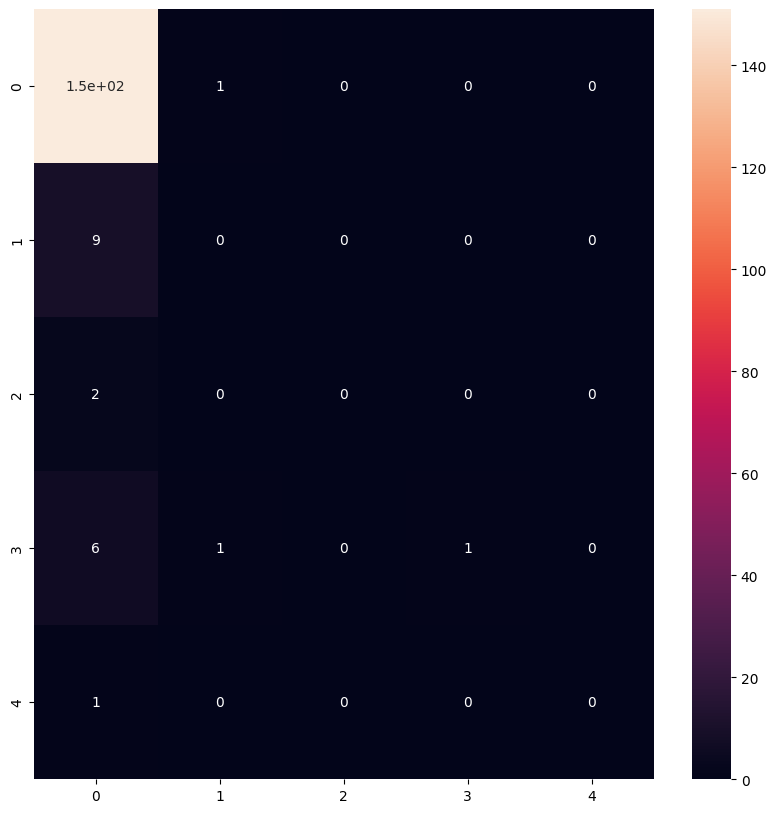

In [1201]:
plt.figure(figsize=(10,10))

matrix = confusion_matrix(y_test, y_hat)
sns.heatmap(matrix, annot=True)